In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast
from matplotlib import pyplot as plt
import ETL_functions as etf

<hr>

## EDA "steam_games"

<hr>

### cargando datos y primeras observaciones

In [82]:
df_sg = pd.read_json(r"../Datasets/steam_games.json/output_steam_games.json", lines=True)#cargando el archivo

In [83]:
df_sg.shape # dimensiones (filas,columnas) 

(120445, 13)

In [84]:
df_sg.sample(5)#ejecute esta linea aprox(5) veces para tener una vision mas amplia de algunos datos aleatorios del df 
               #notando que hay muchas filas llenas de valores None o NaN
               #a demas hay columnas que contienen listas como valores

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88859,Sonic Boom Games,"[Indie, Casual]",Rhythm Zone Tornado Visualizer DLC,Rhythm Zone Tornado Visualizer DLC,http://store.steampowered.com/app/38923/Rhythm...,2010-11-09,"[Indie, Casual]",http://steamcommunity.com/app/38923/reviews/?b...,"[Single-player, Multi-player, Downloadable Con...",0.99,0.0,38923.0,Sonic Boom Games
48394,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
118278,Square Enix,None,Pandemonium,Pandemonium,http://store.steampowered.com/app/243020/Pande...,1996-10-31,"[Platformer, Classic]",http://steamcommunity.com/app/243020/reviews/?...,[Single-player],6.99,0.0,243020.0,Crystal Dynamics
17649,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
279,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None


    en un primer vistaso podemos notar:
* una gran cantidad de nulos
* registros duplicados 
* contamos con 3 campos de listas

    transformare las columnas listas a str para poder trabajar el dataset ya que pandas no me deja tratarlos en estado listas

In [85]:
df_sg["genres"] = df_sg["genres"].astype(str)
df_sg["tags"] = df_sg["tags"].astype(str)
df_sg["specs"] = df_sg["specs"].astype(str)

    ahora procedo a ver duplicados y nulos con esta funcion de el archivo ETL_functions

In [86]:
etf.data_review(df_sg)


Total rows:  120445

Total full null rows:  0

Total duplicated rows: 88309


,Column,dType,No_Null_%,No_Null_Qty,Null_%,Null_Qty
0,publisher,"[<class 'NoneType'>, <class 'str'>]",20.00,24083,80.00,96362
1,genres,[<class 'str'>],100.00,120445,0.00,0
2,app_name,"[<class 'NoneType'>, <class 'str'>]",26.68,32133,73.32,88312
3,title,"[<class 'NoneType'>, <class 'str'>]",24.98,30085,75.02,90360
4,url,"[<class 'NoneType'>, <class 'str'>]",26.68,32135,73.32,88310
5,release_date,"[<class 'NoneType'>, <class 'str'>]",24.96,30068,75.04,90377
6,tags,[<class 'str'>],100.00,120445,0.00,0
7,reviews_url,"[<class 'NoneType'>, <class 'str'>]",26.68,32133,73.32,88312
8,specs,[<class 'str'>],100.00,120445,0.00,0
9,price,"[<class 'NoneType'>, <class 'float'>, <class '...",25.54,30758,74.46,89687


    lo que nos dice basicamente es que hay 88309 registros duplicados de 120445 filas y nos devuelve un dataframe que nos muestra cantidad de nulos y que porcentaje dela columna son nulos 

voy a hacer un drop_duplicated solo para ver que si borramos los duplicados cunta cantidad de nulos nos queda

In [87]:
df_sg.drop_duplicates(inplace=True)

In [88]:
df_sg.head(3)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
88310,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,0.0,761140.0,Kotoshiro
88311,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,0.0,643980.0,Secret Level SRL


tambien borro el unico registro que quedo de todos los que habia de filas completamente llenas de valores nulos

In [89]:
df_sg.drop(0,inplace=True)

In [90]:
df_sg.head(3)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,0.0,761140.0,Kotoshiro
88311,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,0.0,643980.0,Secret Level SRL
88312,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free to Play,0.0,670290.0,Poolians.com


ahora que nuestro datasets no tiene duplicados veamos cuantos valores nulos tiene en realidad

In [91]:
etf.data_review(df_sg)


Total rows:  32135

Total full null rows:  0

Total duplicated rows: 0


,Column,dType,No_Null_%,No_Null_Qty,Null_%,Null_Qty
0,publisher,"[<class 'str'>, <class 'NoneType'>]",74.94,24083,25.06,8052
1,genres,[<class 'str'>],100.00,32135,0.00,0
2,app_name,"[<class 'str'>, <class 'NoneType'>]",99.99,32133,0.01,2
3,title,"[<class 'str'>, <class 'NoneType'>]",93.62,30085,6.38,2050
4,url,[<class 'str'>],100.00,32135,0.00,0
5,release_date,"[<class 'str'>, <class 'NoneType'>]",93.57,30068,6.43,2067
6,tags,[<class 'str'>],100.00,32135,0.00,0
7,reviews_url,"[<class 'str'>, <class 'NoneType'>]",99.99,32133,0.01,2
8,specs,[<class 'str'>],100.00,32135,0.00,0
9,price,"[<class 'float'>, <class 'str'>, <class 'NoneT...",95.71,30758,4.29,1377


    aahora vemos que nos quedan 32125 registros unicos  y la cantidad de nulos no es tanta como cuando tenia duplicados con los duplicados llegaba a 80 mil valores nulos encada columna ahora la que mas tiene es 8000 y otras 4 que tienen en promedio alrededor de 2000 nulos

tambien podemos obserbar diferentes tipos de datos como por ejemplo:

* price que contiene floats,str,y nulos
*  id que tiene float

    voy a guardar la columna de el dataframe en una variable para asi manipularla mejor individualmente

In [92]:
precio = df_sg["price"]
identificador = df_sg["id"] 

llamamos la columna precio

In [93]:
precio

88310             4.99
88311     Free To Play
88312     Free to Play
88313             0.99
88314             2.99
              ...     
120440            1.99
120441            4.99
120442            1.99
120443            4.99
120444            4.99
Name: price, Length: 32135, dtype: object

a  simple vista podemos ver que lo que nos decia la funcion era cierto tenia falores de texto por lo cual el campo estaba en str

    llamo a una funcion que hice para casos como este y nos devuelve lo  siguiente una lista con los valores que no pueden convertirse a numerico

In [94]:
etf.valores_no_numericos(precio)

['Free To Play',
 'Free to Play',
 'Free',
 'Free Demo',
 'Play for Free!',
 'Install Now',
 'Play WARMACHINE: Tactics Demo',
 'Free Mod',
 'Install Theme',
 'Third-party',
 'Play Now',
 'Free HITMAN™ Holiday Pack',
 'Play the Demo',
 'Starting at $499.00',
 'Starting at $449.00',
 'Free to Try',
 'Free Movie',
 'Free to Use']

    pero podemos notar que si puede haber una relacion entre la cadena y el precio por ej:

* starting at $499.00  se podria cambiar a 499.00
* starting at $449.00  se podria cambiar a 449.00

    y el resto de valorees podria cambiarlos por 00.00
    ya que pareciera que todos hacen referncia a que el precio como tal es 0 (gratis)
    (third-party podria ser una excepcion pero aun asi se puede remplazar a 0) 

    voy a proceder a hacer las transformaciones para poder graficar la distribucion de los precios y frecuencia mas tarde

In [95]:
no_num = etf.valores_no_numericos(precio)

In [96]:
precio[precio == 'Starting at $499.00'] = 499.00

C:\Users\delba\AppData\Local\Temp\ipykernel_14100\3995794199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precio[precio == 'Starting at $499.00'] = 499.00


In [97]:
precio[precio == 'Starting at $449.00'] = 449.00

C:\Users\delba\AppData\Local\Temp\ipykernel_14100\2224725509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precio[precio == 'Starting at $449.00'] = 449.00


podemos verificar que esas cadenas ya no se encuentran

In [98]:
precio[precio == 'Starting at $499.00']

Series([], Name: price, dtype: object)

In [99]:
precio[precio == 'Starting at $449.00']

Series([], Name: price, dtype: object)

ahora quitare estos elementos de no_num(lista con los valores que no se pueden transformar a numericos de la columna precios)

In [100]:
no_num.remove('Starting at $499.00')
no_num.remove('Starting at $449.00')

llamamos a la lista y vemos que efectivamente ya no se encuentran en la lista

In [101]:
no_num

['Free To Play',
 'Free to Play',
 'Free',
 'Free Demo',
 'Play for Free!',
 'Install Now',
 'Play WARMACHINE: Tactics Demo',
 'Free Mod',
 'Install Theme',
 'Third-party',
 'Play Now',
 'Free HITMAN™ Holiday Pack',
 'Play the Demo',
 'Free to Try',
 'Free Movie',
 'Free to Use']

ahora cambiaremos todas las considencias con estos valores a 0.00

In [102]:
precio[precio.isin(no_num)]

88311     Free To Play
88312     Free to Play
88321             Free
88370             Free
88501             Free
              ...     
120317            Free
120387            Free
120410    Free To Play
120411            Free
120431            Free
Name: price, Length: 1908, dtype: object

In [103]:
precio[precio.isin(no_num)] = 0.00

C:\Users\delba\AppData\Local\Temp\ipykernel_14100\2798624370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precio[precio.isin(no_num)] = 0.00


volvemos a filtrar y notamos que ya no nos devuelve registros con los valores de la lista

In [104]:
precio[precio.isin(no_num)]

Series([], Name: price, dtype: object)

cambiamos el tipo a float

In [105]:
precio =  precio.astype(float)

lo cambio sin problemas lo que quiere decir que ya tenemos todos los precios en formato numerico

In [106]:
precio.sample(7)# llamamos esta instrucion y vemos que ya no poseemos los valores de cadena pero si poseemos NaN´s ya que puede que haya valores que estaban en numerico y aun  asi se transformaro mal

113519     NaN
111598    4.99
113288    0.99
94446     3.99
93476     1.99
106290    4.99
113543    9.99
Name: price, dtype: float64

voy a dropear todos esos NaN ya que la idea es solo tener una columna para graficar y no tener una columna util para otro proposito en especifico

In [107]:
precio

88310     4.99
88311     0.00
88312     0.00
88313     0.99
88314     2.99
          ... 
120440    1.99
120441    4.99
120442    1.99
120443    4.99
120444    4.99
Name: price, Length: 32135, dtype: float64

In [108]:
precio.isna().sum()#1377 NaN

1377

In [109]:
precio.dropna(inplace=True)

In [110]:
precio.isna().sum()# 0 NaN

0

    ahora analizare la columna id que guarde en la variable identificador

In [111]:
identificador.duplicated().sum()#tenemos 2 id repetidos lo que es raro ya que dropeamos duplicados en df_sg(dataframe de steam_games)

2

In [112]:
identificador.isna().sum()#tambien contamos con 2 nulos por lo que deberian ser los nulos los duplicados

2

dropeo los nulos y reviso los duplicados nuevamente

In [113]:
identificador.dropna(inplace=True)

In [114]:
identificador.isna().sum()#dropeamos los nulos y ahora contamos con 0

0

In [115]:
identificador.duplicated().sum()#pero aun contamos con 1 duplicado al dropera los con NaN nos desasimos de 1 duplicado este duplicado debe deberse a que en df_sg tenemos 2 registros iguales pero que se diferencian en alguna columna por lo que no fue borrado en el drop_duplicated

1

In [116]:
identificador.drop_duplicates(inplace=True)

ahora que ya no tengo duplicados puedo hacer un count de cuantos juegos diferentes hay aunque podria hacer lo mismo contando las filas

In [117]:
identificador.count()#32132 juegos diferentes tenemos

32132

    tambien podemos analizar la columnaa title y app_name para ver en que se diferenciany url

In [118]:
df_sg[["app_name","title","url"]]

,app_name,title,url
88310,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...
88311,Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...
88312,Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...
88313,弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/
88314,Log Challenge,None,http://store.steampowered.com/app/773570/Log_C...
...,...,...,...
120440,Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...
120441,LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...
120442,Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...
120443,EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...


    podemos decir que:

* la columnaa app_name y title tienen los mismos valores
* por lo tanto app_name sirve para rellenar donde title tenga nulo y viceversa
* en caso de trabajar con alguna de estas columnas solo necesitariamos una pudiendo rellenar con los valores de laa otra de ser necesario

tambien podemos afirmar cierta similitud con la columna url ya que al final de la url se posee el nombre y posiblemente:

* se puede extraer con una expresion regular
* reemplazar los _ por espacios y con eso podriamos conseguir el nombre

    ahora analizemos genres tags y specs

In [119]:
gen_tag_spec = df_sg[["genres","tags","specs"]]

In [120]:
gen_tag_spec

,genres,tags,specs
88310,"['Action', 'Casual', 'Indie', 'Simulation', 'S...","['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",['Single-player']
88311,"['Free to Play', 'Indie', 'RPG', 'Strategy']","['Free to Play', 'Strategy', 'Indie', 'RPG', '...","['Single-player', 'Multi-player', 'Online Mult..."
88312,"['Casual', 'Free to Play', 'Indie', 'Simulatio...","['Free to Play', 'Simulation', 'Sports', 'Casu...","['Single-player', 'Multi-player', 'Online Mult..."
88313,"['Action', 'Adventure', 'Casual']","['Action', 'Adventure', 'Casual']",['Single-player']
88314,None,"['Action', 'Indie', 'Casual', 'Sports']","['Single-player', 'Full controller support', '..."
...,...,...,...
120440,"['Casual', 'Indie', 'Simulation', 'Strategy']","['Strategy', 'Indie', 'Casual', 'Simulation']","['Single-player', 'Steam Achievements']"
120441,"['Casual', 'Indie', 'Strategy']","['Strategy', 'Indie', 'Casual']","['Single-player', 'Steam Achievements', 'Steam..."
120442,"['Indie', 'Racing', 'Simulation']","['Indie', 'Simulation', 'Racing']","['Single-player', 'Steam Achievements', 'Steam..."
120443,"['Casual', 'Indie']","['Indie', 'Casual', 'Puzzle', 'Singleplayer', ...","['Single-player', 'Steam Achievements', 'Steam..."


    podemos notar:
* valores None pero que no cuentan como tales debido a que fueron convertidos a string
* que hay algunos campos que se comparten entre genres y tags (lo que no quiere decir que todos los tags sean generos)
* valores muy parecidos entre tags y specs pero a su vez distintos por la cadena en si

    sabiendo esto podemos obtener las categorias unicas de cada columna y ver que relaciones tienen entre si
* la interseccion  entre los valores unicos de cada columna para saber que valores de una se pueden ingresaar en otra en caso de estar faltantes

    esto lo verifique en el etl y la columna specs no la vamos a usar tiene 1 solo elemento en comun con tags 
    mientras que tags  si tiene una buena cantidad de elementos en comun con genres
    y en caso de ser necesario podemos rellenar genres con los valores de tags en la misma columna que esten en la interseccion entre genero y tags

<hr>

# ETL "user_reviews"

    este archivo se encontraba mal estructurado por lo que tuve que abrirlo de la siguiente manera

In [121]:
reviews = []

with open(r"../Datasets/user_reviews.json/australian_user_reviews.json", encoding='utf-8') as f:
    for line in f.readlines():
        reviews.append(ast.literal_eval(line))
df_ur = pd.DataFrame(reviews)

miramos el dataframe resultante

In [122]:
df_ur

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."
...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la..."
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l..."
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',..."
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l..."


donde notamos la siguiente estructura
|columna |tipo|
|--------|----|
|user_id | str|
|user_url| str|
|reviews |list|

reviews contiene una lista  con jsons anidados

    para acceder a los valores de esta podriamos usar el metodo de pandas pd.json_normalize()

In [123]:
pd.json_normalize(df_ur["reviews"])# si lo hacemos de esta forma obtendremos un dataframe de jsons

,0,1,2,3,4,5,6,7,8,9
0,"{'funny': '', 'posted': 'Posted November 5, 20...","{'funny': '', 'posted': 'Posted July 15, 2011....","{'funny': '', 'posted': 'Posted April 21, 2011...",None,None,None,None,None,None,None
1,"{'funny': '', 'posted': 'Posted June 24, 2014....","{'funny': '', 'posted': 'Posted September 8, 2...","{'funny': '', 'posted': 'Posted November 29, 2...",None,None,None,None,None,None,None
2,"{'funny': '', 'posted': 'Posted February 3.', ...","{'funny': '', 'posted': 'Posted December 4, 20...","{'funny': '', 'posted': 'Posted November 3, 20...","{'funny': '', 'posted': 'Posted October 15, 20...","{'funny': '', 'posted': 'Posted October 15, 20...","{'funny': '', 'posted': 'Posted October 15, 20...",None,None,None,None
3,"{'funny': '', 'posted': 'Posted October 14, 20...","{'funny': '', 'posted': 'Posted July 28, 2012....","{'funny': '', 'posted': 'Posted June 2, 2012.'...","{'funny': '', 'posted': 'Posted June 29, 2014....","{'funny': '', 'posted': 'Posted November 22, 2...","{'funny': '', 'posted': 'Posted February 23, 2...",None,None,None,None
4,"{'funny': '3 people found this review funny', ...","{'funny': '1 person found this review funny', ...","{'funny': '2 people found this review funny', ...","{'funny': '', 'posted': 'Posted July 11, 2013....",None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
25794,"{'funny': '', 'posted': 'Posted May 31.', 'las...",None,None,None,None,None,None,None,None,None
25795,"{'funny': '', 'posted': 'Posted June 17.', 'la...",None,None,None,None,None,None,None,None,None
25796,"{'funny': '1 person found this review funny', ...",None,None,None,None,None,None,None,None,None
25797,"{'funny': '', 'posted': 'Posted July 21.', 'la...","{'funny': '', 'posted': 'Posted July 10.', 'la...","{'funny': '', 'posted': 'Posted July 10.', 'la...","{'funny': '', 'posted': 'Posted July 8.', 'las...",None,None,None,None,None,None


In [124]:
pd.json_normalize(df_ur["reviews"][0])# si lo hacemos de esta forma obtenemos un dataframe con los valores de los json de la columna en el indice que accedemos

,funny,posted,last_edited,item_id,helpful,recommend,review
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...


    viendo que no era necesario conservar la relacion entre usuario que hace la review y la mismaa decidi separar esta columna de el archivo y crear un archivo nuevo donde tenga todos los registros en un solo datafrane

en cuanto a user_id y iser_url los guarde en otro archivo por si fuera necesario ultilizarlos

<hr>

## ETL "users_items"

    otra vez el archivo contava con problemas de estructura y hizo falta abrirlo de esta manera

In [125]:
items = []

with open(r'../Datasets/users_items.json/australian_users_items.json', 'r', encoding='utf-8') as f:
    for line in f.readlines():
        items.append(ast.literal_eval(line))

df_ui = pd.DataFrame(items)

In [126]:
df_ui.sample(5)#repetimos el sample varias veces

,user_id,items_count,steam_id,user_url,items
39741,Conan83,20,76561198061122121,http://steamcommunity.com/id/Conan83,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
47963,meepersjeepers,10,76561198028340055,http://steamcommunity.com/id/meepersjeepers,"[{'item_id': '205790', 'item_name': 'Dota 2 Te..."
37190,sea_storm,24,76561198145331641,http://steamcommunity.com/id/sea_storm,"[{'item_id': '4000', 'item_name': 'Garry's Mod..."
82340,76561198095150825,28,76561198095150825,http://steamcommunity.com/profiles/76561198095...,"[{'item_id': '4000', 'item_name': 'Garry's Mod..."
52733,76561198046730804,6,76561198046730804,http://steamcommunity.com/profiles/76561198046...,"[{'item_id': '4000', 'item_name': 'Garry's Mod..."


## tipos de datos

|columna|tipo|
|-------|----|
|user_id|str|
|item_counts|int|
|steam_id|int|
|user_url|str|
|item|list|

en este caso como puede que si sea importante mantener la relacion entre las demas columnas y la lista  de jsons anidados tuvimos que desanidarlo de la siguiente manera:

In [127]:
# Desanidamos la columna items

desanidado = []
for index, row in df_ui.iterrows():#este primer bucle recorre las filas y guarda los valores user_id ,user_url, y items_count en variables
    user_id = row['user_id']
    user_url = row['user_url']
    user_items_count = row['items_count']
    for df_items_dict in row['items']:# este segundo bucle itera sobre la lista de items en la columna items de la filaa de el primer bucley agrega estos campos a el diccionario de items
        df_items_dict['user_id'] = user_id
        df_items_dict['user_url'] = user_url
        df_items_dict['items_count'] = user_items_count
        desanidado.append(df_items_dict)#se agrega el diccionario de item desanidado a la lista y ahora posee esas columnas que guardan el valor relacionado a la fila en la que se encontraba el items anidado

df_ui = pd.DataFrame(desanidado)#creo un dataframe con los elementos que se guardaron en la lista desanidado

In [128]:
df_ui

,item_id,item_name,playtime_forever,playtime_2weeks,user_id,user_url,items_count
0,10,Counter-Strike,6,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,277
1,20,Team Fortress Classic,0,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,277
2,30,Day of Defeat,7,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,277
3,40,Deathmatch Classic,0,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,277
4,50,Half-Life: Opposing Force,0,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,277
...,...,...,...,...,...,...,...
5153204,346330,BrainBread 2,0,0,76561198329548331,http://steamcommunity.com/profiles/76561198329...,7
5153205,373330,All Is Dust,0,0,76561198329548331,http://steamcommunity.com/profiles/76561198329...,7
5153206,388490,One Way To Die: Steam Edition,3,3,76561198329548331,http://steamcommunity.com/profiles/76561198329...,7
5153207,521570,You Have 10 Seconds 2,4,4,76561198329548331,http://steamcommunity.com/profiles/76561198329...,7


    ahora tenemos este dataframe con 5153208 filas y 7 columnas que limpiamos en etl y guardamos en  un archivo pero aqui lo que queremos hacer es solo analisar diferentes cosas

en este caso solo hay 3 columnas que nos serviria analizar las cuales seria playtime_forever , playtime_2weeks y items count

el resto no por que son solo referecias a el juego que tiene en biblioteca o jugo y la cantidad de items que tiene items_count(que es igual a contar cuantas veces se repite un user_id  en el dataframe)

In [129]:
playtime = df_ui[["playtime_forever","playtime_2weeks"]]

In [130]:
playtime

,playtime_forever,playtime_2weeks
0,6,0
1,0,0
2,7,0
3,0,0
4,0,0
...,...,...
5153204,0,0
5153205,0,0
5153206,3,3
5153207,4,4


    podemos observar:
* muchos valores 0  lo que indica que ese usuario no jugo nada
* la columna playtime forever pareciera estar representada en minutos
* playtime_2weeks hace referencia a el tiempo jugado en las ultimas 2 semanas

sabiendo esto ignorare playtime_2weeks y me enfocare en play time forever

In [131]:
del playtime["playtime_2weeks"]

In [132]:
playtime

,playtime_forever
0,6
1,0
2,7
3,0
4,0
...,...
5153204,0
5153205,0
5153206,3
5153207,4


Text(0, 0.5, 'cantidad de usuarios')

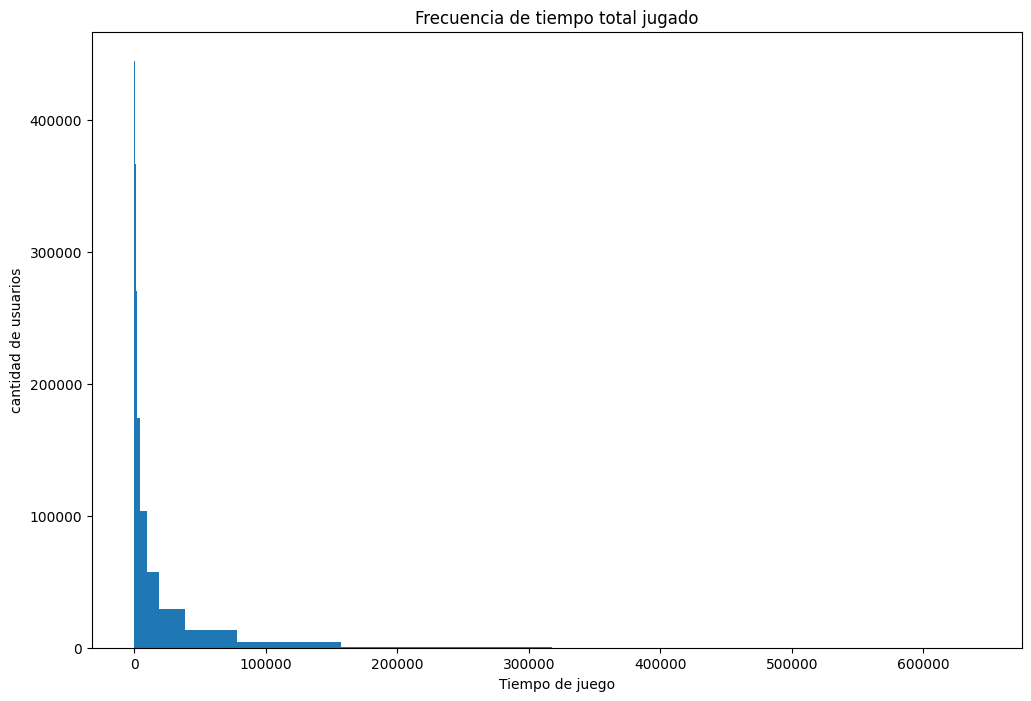

In [165]:
plt.figure(figsize=(12, 8))
plt.hist(playtime["playtime_forever"],bins=np.logspace(0, np.log10(playtime["playtime_forever"].max()+1), 20))
plt.title('Frecuencia de tiempo total jugado')
plt.xlabel('Tiempo de juego')
plt.ylabel('cantidad de usuarios')

In [134]:
print(f'la media es:{np.mean(playtime["playtime_forever"])}')
print(f'la mediana es:{np.median(playtime["playtime_forever"])}')
print(f'la moda es:{playtime.mode().values[0][0]}')

la media es:991.4951407947941
la mediana es:34.0
la moda es:0


    con este grafico podemos:
* que la distribucion esta sesgada a la  derecha ya que la moda es 0 la mediana se encuentra a la derecha (la media es mayor que la mediana)
* ver que hay mayor cantidad de registros con pocas horas jugadas que con mayor cantidad de horas jugadas

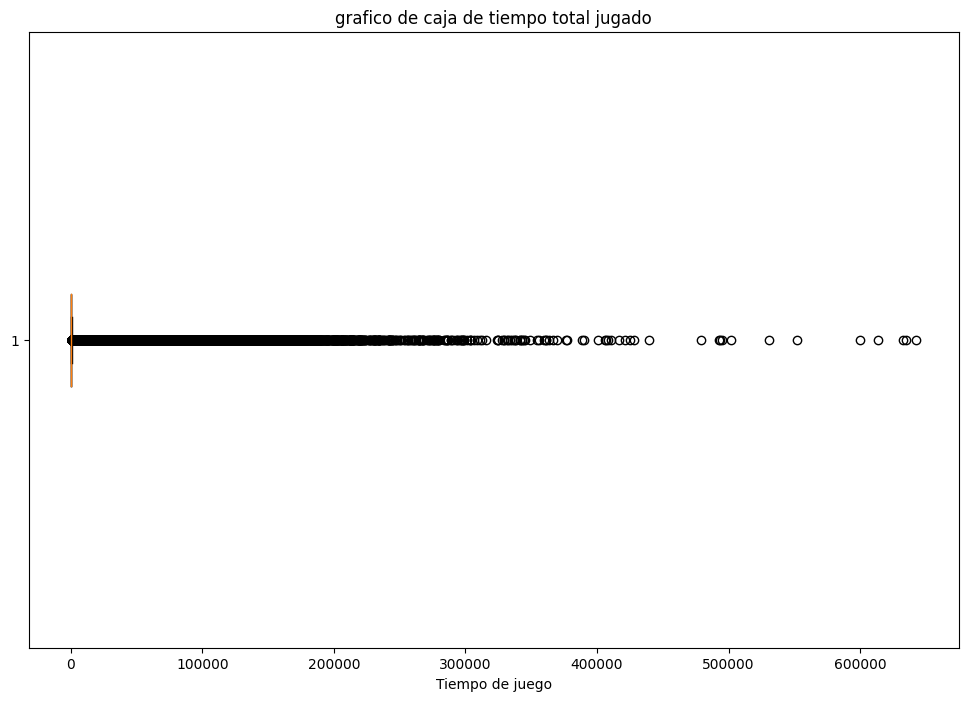

In [166]:
plt.figure(figsize=(12, 8))
plt.boxplot(playtime, vert=False)
plt.title('grafico de caja de tiempo total jugado')
plt.xlabel('Tiempo de juego')
plt.show()

In [136]:
playtime["playtime_forever"].sort_values(ascending=False).head(1).values[0]#este es el valor mas alto que hay en playtime

642773

    al graficar el boxplot podemos notar:
* que al estar la maayoria de registros en 0 nos toma como que la mayoria de valores son outliers
* cuando esto puede que no sea asi ya que es el tiempo total que se jugo y puede ser la acumulacion de varios años
* siendo incluso el valor mas alto 642773 un valor posible para esta categoria siendo 1 año entero que puede haber acumulado durante cada tiempo de juego durante años

    ahora analizare cantidad de item

In [137]:
cantidad_items = df_ui["items_count"]

In [138]:
cantidad_items

0          277
1          277
2          277
3          277
4          277
          ... 
5153204      7
5153205      7
5153206      7
5153207      7
5153208      7
Name: items_count, Length: 5153209, dtype: int64

Text(0, 0.5, 'cantidad de usuarios')

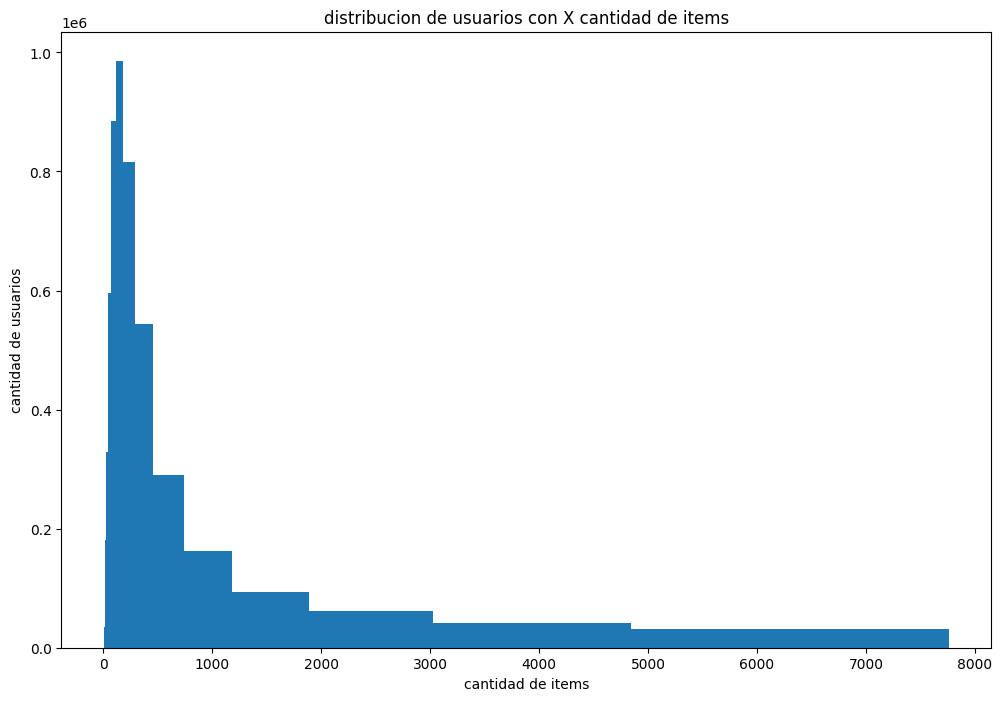

In [167]:
plt.figure(figsize=(12, 8))
plt.hist(cantidad_items,bins=np.logspace(0, np.log10(cantidad_items.max()+1), 20))
plt.title('distribucion de usuarios con X cantidad de items')
plt.xlabel('cantidad de items')
plt.ylabel('cantidad de usuarios')

In [140]:
print(f'la media es:{np.mean(cantidad_items)}')
print(f'la mediana es:{np.median(cantidad_items)}')
print(f'la moda es:{cantidad_items.mode().values[0]}')

la media es:314.7229326425534
la mediana es:138.0
la moda es:51


    esta distribucion tambien se encuentra sesgada a la derecha
* la media es mayor a la mediana pero no por tanta diferencia como en playtime_forever
* en este caso la moda es 51 lo que quiere decir que la mayor parte de los usuarios estan alrededor de ese numero de items("juegos")en la biblioteca

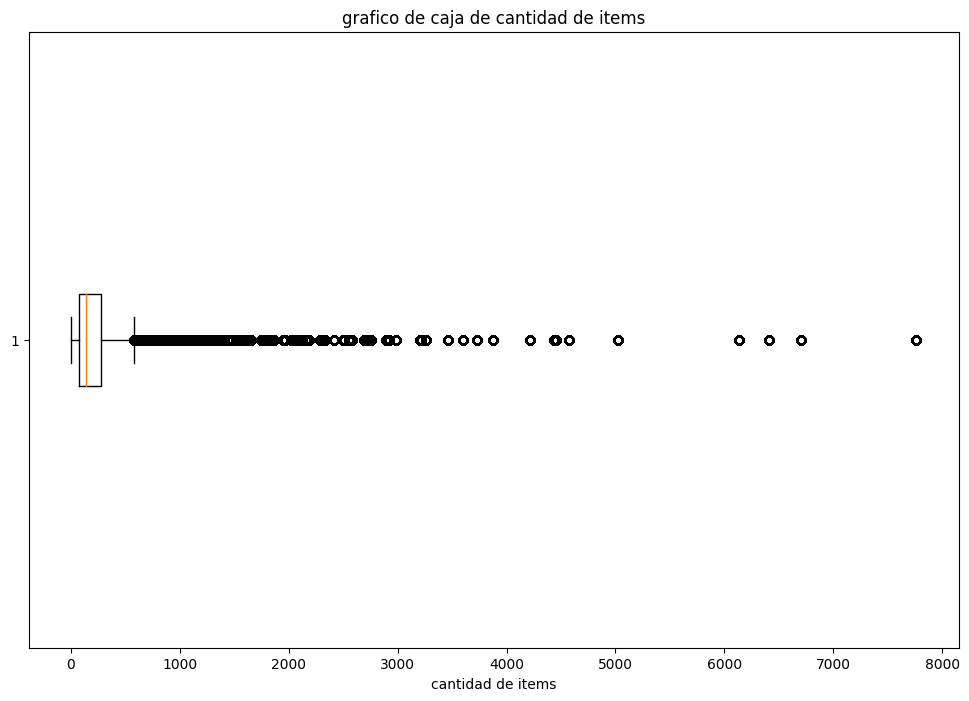

In [168]:
plt.figure(figsize=(12, 8))
plt.boxplot(cantidad_items, vert=False)
plt.title("grafico de caja de cantidad de items")
plt.xlabel("cantidad de items")
plt.show()

    podemos notar:
* que el boxplot marca una gran cantidad de valores que se consideran outliers
* podemos notar que el 50% de los datos se encuentran por debajo de 500 (lo que puede ser logico ya que jugar muchos mas juegos seria bastante raro ya que muchos hay que pagar precios para tenerlos)
* teniendo que de 700 items para arriba son valores atipicos

In [142]:
precio

88310     4.99
88311     0.00
88312     0.00
88313     0.99
88314     2.99
          ... 
120440    1.99
120441    4.99
120442    1.99
120443    4.99
120444    4.99
Name: price, Length: 30758, dtype: float64

Text(0, 0.5, 'cantidad de juegos')

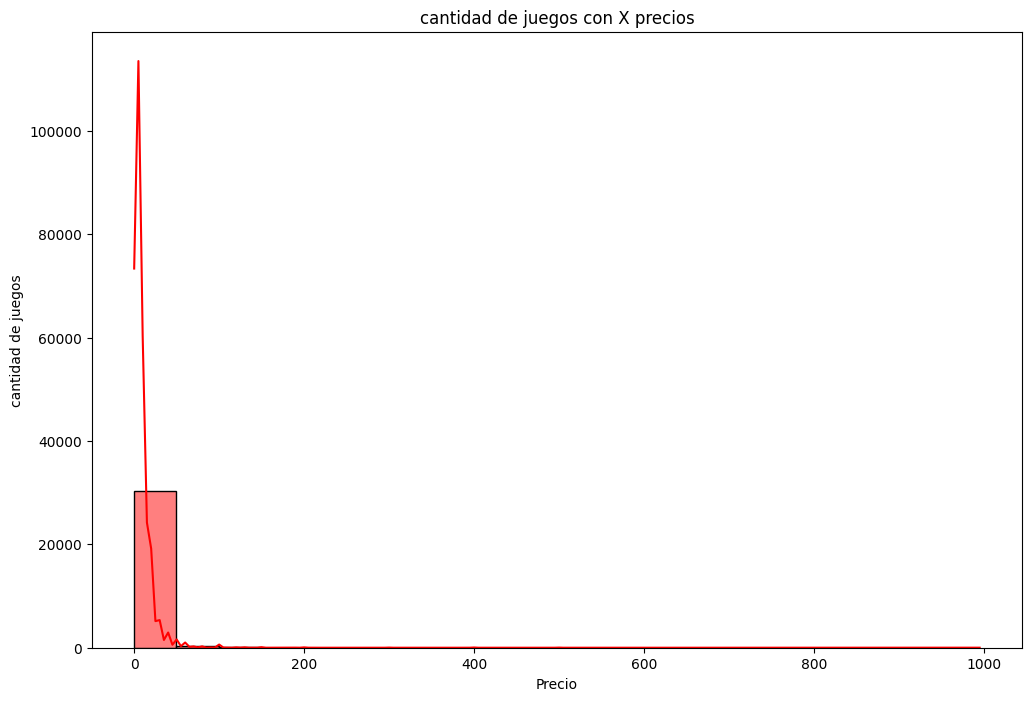

In [170]:
plt.figure(figsize=(12, 8))
sns.histplot(precio, bins=20, kde=True, color="red")
plt.title("cantidad de juegos con X precios")
plt.xlabel("Precio")
plt.ylabel("cantidad de juegos")

In [144]:
print(f'la media es:{np.mean(precio)}')
print(f'la mediana es:{np.median(precio)}')
print(f'la moda es:{precio.mode().values[0]}')

la media es:8.897676051758893
la mediana es:4.99
la moda es:4.99


    con esto podemos observar:
* esta sesgada a la derecha (la media es mayor a la mediaaanaa)
* la mayoria de valores estan cercanos a 0 y mientras mas se alejan mas se reduce su frecuencia
* la maayor distribucion se encuentra entre 0 y 50

Text(0.5, 0, 'Precio')

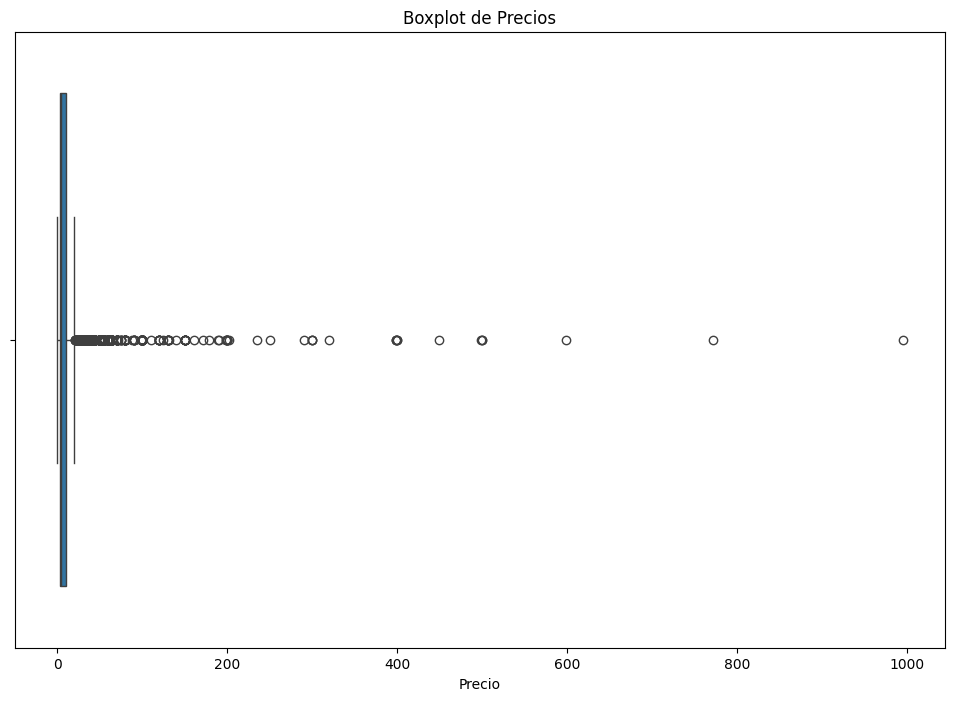

In [171]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=precio)
plt.title('Boxplot de Precios')
plt.xlabel('Precio')

    podemos notar:
* la media y la mediana son muy ceranas a 0 
* el boxplot nos dice que a partir de aaproximadamente 25 empieza a tomarlos como outliers

<hr>

In [146]:
df_recommend = pd.read_parquet(r"../app/df_recommend.parquet")

In [147]:
    # Cuenta la cantidad de sentimientos 0, 1 y 2
count0 = df_recommend[df_recommend['sentimiento'] == 0].count()
count1 = df_recommend[df_recommend['sentimiento'] == 1].count()
count2 = df_recommend[df_recommend['sentimiento'] == 2].count()

Text(0.5, 1.0, 'Distribución de Sentimientos')

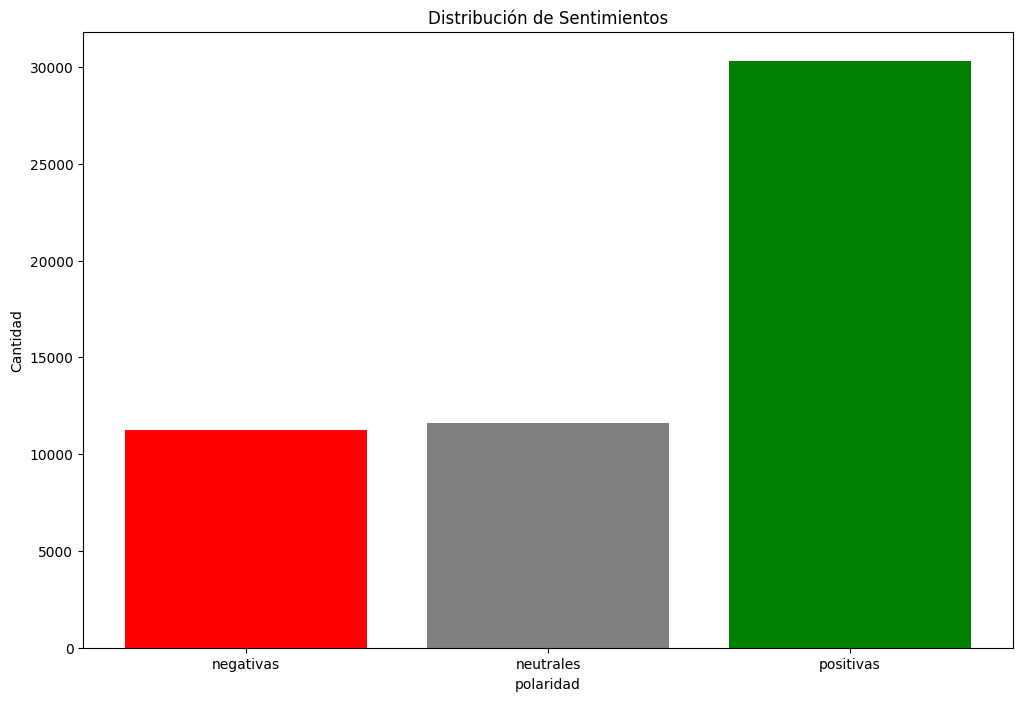

In [173]:
plt.figure(figsize=(12, 8))
plt.bar(["negativas","neutrales","positivas"],[count0["sentimiento"],count1["sentimiento"],count2["sentimiento"]],color=["red","grey","green"])
plt.xlabel('polaridad')
plt.ylabel('Cantidad')
plt.title('Distribución de Sentimientos')

In [149]:
print(f'la cantidad de comentarios negativos a juegos es:{count0["sentimiento"]}')
print(f'la cantidad de comentarios neutrales a juegos es:{count1["sentimiento"]}')
print(f'la cantidad de comentarios positivos a juegos es {count2["sentimiento"]}')

la cantidad de comentarios negativos a juegos es:11255
la cantidad de comentarios neutrales a juegos es:11631
la cantidad de comentarios positivos a juegos es 30304


In [150]:
#cuenta las recomendaciones True y false
reco_true = df_recommend[df_recommend['recommend'] == True].count()
reco_false = df_recommend[df_recommend['recommend'] == False].count()

Text(0.5, 1.0, 'cantidad de recomendaciones')

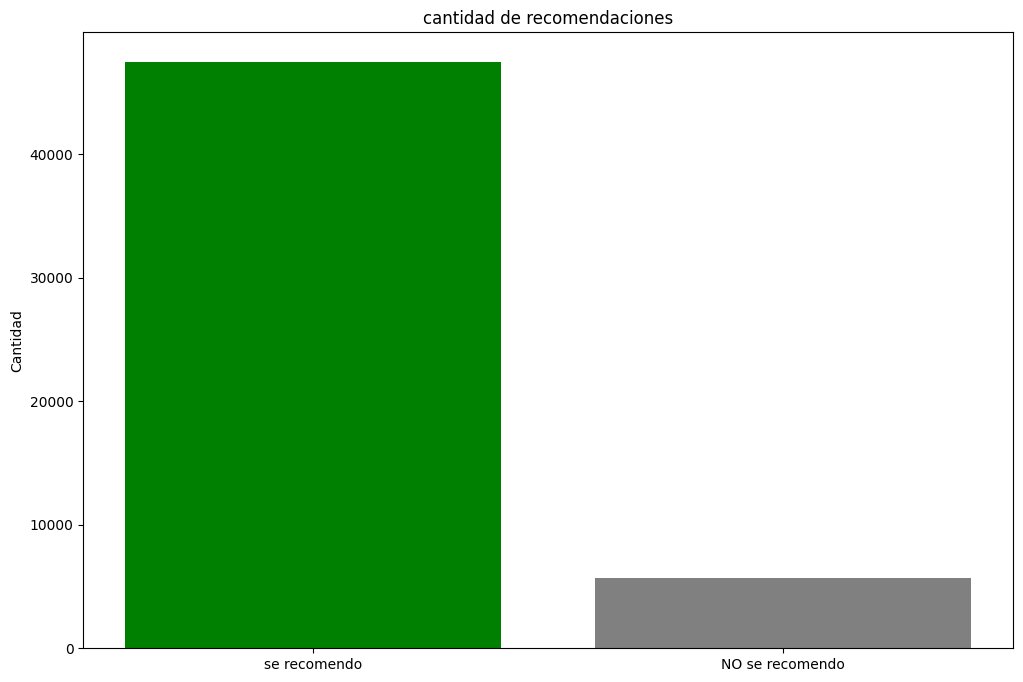

In [174]:
plt.figure(figsize=(12, 8))
plt.bar(["se recomendo","NO se recomendo"],[reco_true["recommend"],reco_false["recommend"]],color=["green", "grey"])
plt.ylabel('Cantidad')
plt.title('cantidad de recomendaciones')

In [152]:
print(f'la cantidad de veces que un usuario recomendo un juego:{reco_true["recommend"]}')
print(f'la cantidad de veces que un usuario NO recomendo un juego:{reco_false["recommend"]}')

la cantidad de veces que un usuario recomendo un juego:47485
la cantidad de veces que un usuario NO recomendo un juego:5705


In [153]:
#cantidad juegos acceso anticipado
eacces = df_sg["early_access"]
eaccessT = eacces[eacces == True].count()
eaccessF = eacces[eacces == False].count()

Text(0.5, 1.0, 'acceso anticipado en juegos')

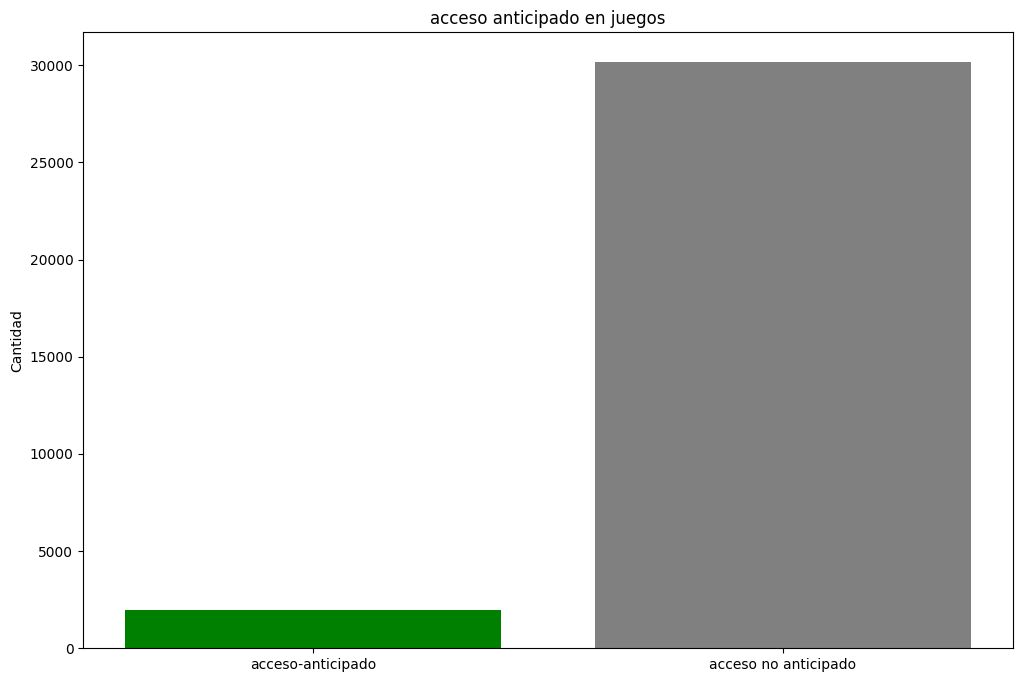

In [154]:
plt.figure(figsize=(12, 8))
plt.bar(["acceso-anticipado","acceso no anticipado"],[eaccessT,eaccessF],color=["green", "grey"])
plt.ylabel('Cantidad')
plt.title('acceso anticipado en juegos')

In [155]:
print(f'la cantidad de juegos que son acceso anticipado:{eaccessT}')
print(f'la cantidad de juegos que no son un acceso anticipado :{eaccessF}')

la cantidad de juegos que son acceso anticipado:1947
la cantidad de juegos que no son un acceso anticipado :30188


In [156]:
#cargando columnas developer y publisher
desarrollador = df_sg["developer"]
publicador = df_sg["publisher"]

In [157]:
desarrollador.dropna(inplace=True)

In [158]:
publicador.dropna(inplace=True)

In [159]:
#top 10 desarrolladores y publicadores que mas se repiten
cantidad_Desarrollador = desarrollador.value_counts()
top_desarrollador = cantidad_Desarrollador[0:10]#tomo de el elemento de el indice 0 al 9

cantidad_publicador = publicador.value_counts()
top_publicador = cantidad_publicador[0:10]#tomo de el elemento de el indice 0 al 9

Text(0.5, 1.0, 'top 10 desarrolladoras con mas participacion')

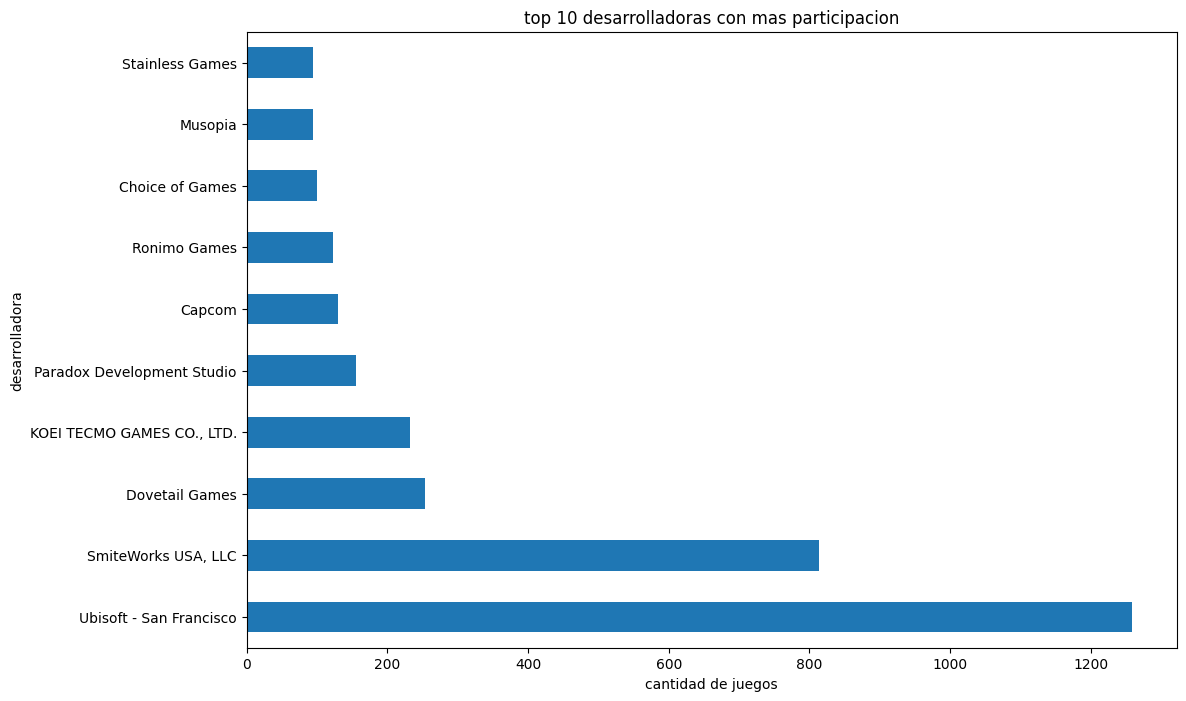

In [160]:
plt.figure(figsize=(12, 8))
top_desarrollador.plot(kind="barh")
plt.ylabel('desarrolladora')
plt.xlabel('cantidad de juegos')
plt.title('top 10 desarrolladoras con mas participacion')

Text(0.5, 1.0, 'publicadoras con mas participacion')

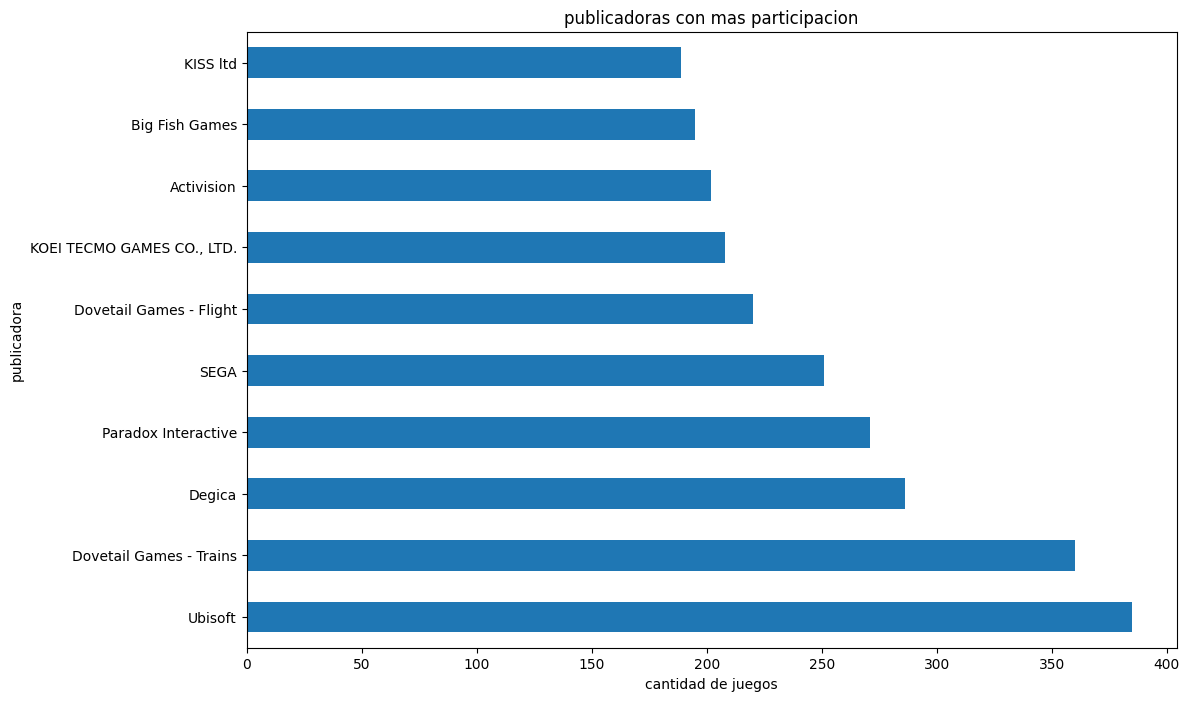

In [161]:
plt.figure(figsize=(12, 8))
top_publicador.plot(kind="barh")
plt.ylabel('publicadora')
plt.xlabel("cantidad de juegos")
plt.title('publicadoras con mas participacion')

In [162]:
top juegos con mayor precio

SyntaxError: invalid syntax (2066620821.py, line 1)

In [ ]:
#columnas juego y nombre
jnombre_precio = df_sg[["app_name","price"]]

In [ ]:
# rellenando  valores de precio para poder graficar
precio = jnombre_precio["price"]

no_num = etf.valores_no_numericos(precio)

precio[precio == 'Starting at $499.00'] = 499.00

precio[precio == 'Starting at $449.00'] = 449.00

no_num.remove('Starting at $499.00')
no_num.remove('Starting at $449.00')

precio[precio.isin(no_num)] = 0.00

precio =  precio.astype(float)

jnombre_precio["price"] = precio

jnombre_precio.dropna(inplace=True)



C:\Users\delba\AppData\Local\Temp\ipykernel_14100\1851988753.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precio[precio == 'Starting at $499.00'] = 499.00
C:\Users\delba\AppData\Local\Temp\ipykernel_14100\1851988753.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precio[precio == 'Starting at $449.00'] = 449.00
C:\Users\delba\AppData\Local\Temp\ipykernel_14100\1851988753.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p

In [ ]:
top_15_juegos = jnombre_precio.sort_values(by="price",ascending=False)[0:15]#tomo de el 0 al 14

Text(0.5, 1.0, 'top 15 juegos mas caros')

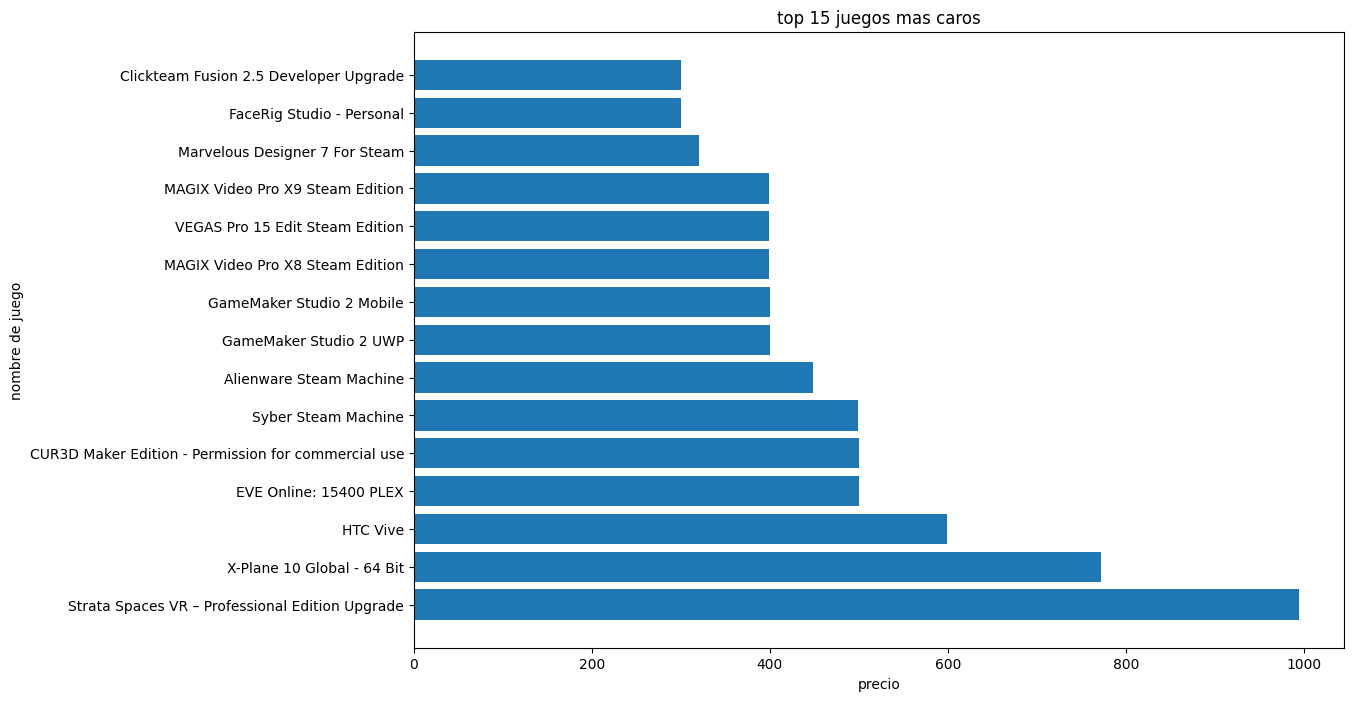

In [ ]:
plt.figure(figsize=(12, 8))
plt.barh(top_15_juegos["app_name"],top_15_juegos["price"])
plt.xlabel('precio')
plt.ylabel("nombre de juego")
plt.title('top 15 juegos mas caros')

In [ ]:
# release date(año)
import re
juegosporaño = juegosporaño[["id","release_date"]]

juegosporaño.dropna(inplace=True)
juegosporaño.drop_duplicates(inplace=True)

pattern = r'\b\d{4}\b'#expresion regular donde  haya 4 numeros juntos 

# Función para aplicar la expresión regular
def obtener_año(value):
    match = re.search(pattern, str(value))
    if match:
        return match.group()
    else:
        return value

# Aplicar la función a la columna 'release_date'
juegosporaño['release_date'] = juegosporaño['release_date'].apply(obtener_año)

no_anio = etf.valores_no_numericos(juegosporaño["release_date"])#la funcion devuelveuna lista y la guardo en una variable

juegosporaño = juegosporaño[~juegosporaño['release_date'].isin(no_anio)]# filtrando el df en donde release_date NO tiene los valores que obtuvimos que no se podian pasar a numerico y sobrescribimos el dataframe con este sin esos valores

juegosporaño['release_date'] = pd.to_datetime(juegosporaño['release_date'], errors='coerce').dt.year

In [ ]:
juegosporaño = juegosporaño.groupby('release_date')['id'].count()

Text(0.5, 1.0, 'lanzamiento de juegos por año')

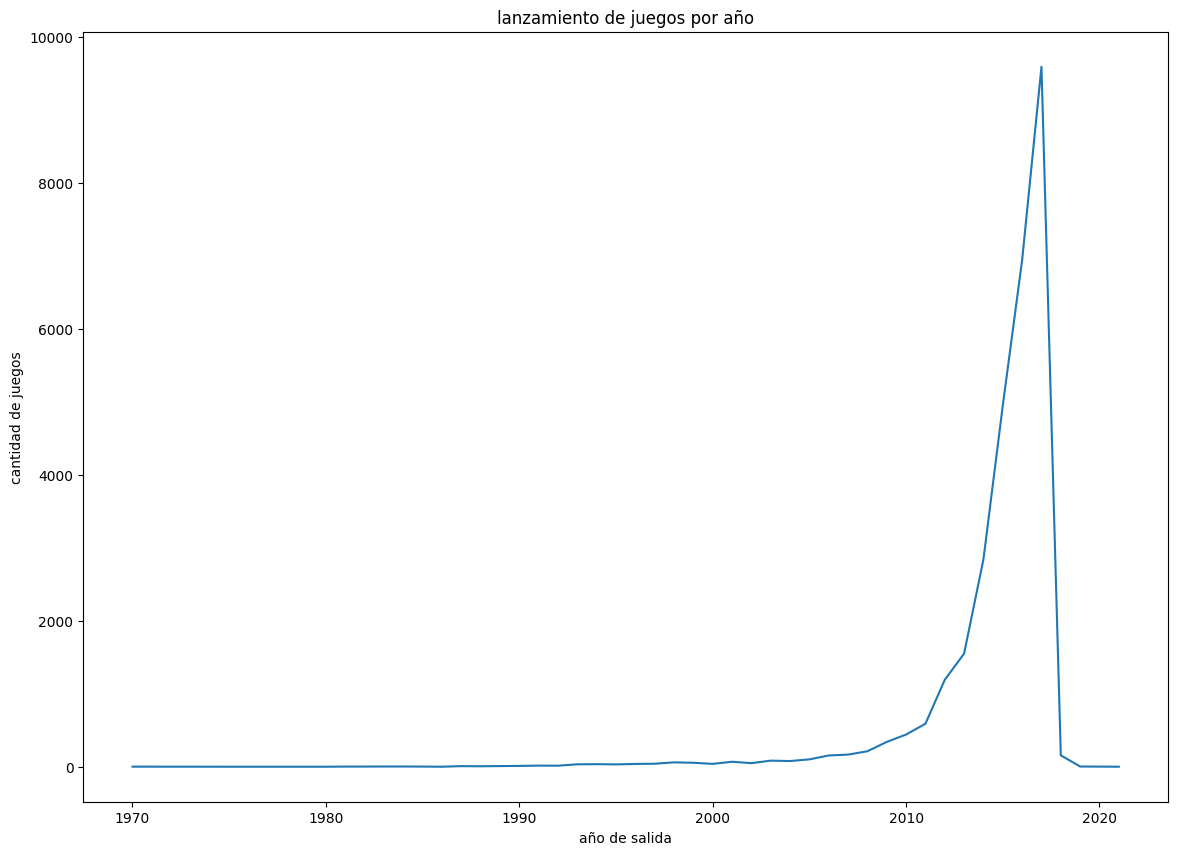

In [176]:
plt.figure(figsize=(14, 10))
juegosporaño.plot(kind="line")
plt.xlabel('año de salida')
plt.ylabel("cantidad de juegos")
plt.title('lanzamiento de juegos por año')